## About
CIFAR100 Image classification using CNNs in PyTorch.

#### Classes Description
Classes:
```
1-5) beaver, dolphin, otter, seal, whale
6-10) aquarium fish, flatfish, ray, shark, trout
11-15) orchids, poppies, roses, sunflowers, tulips
16-20) bottles, bowls, cans, cups, plates
21-25) apples, mushrooms, oranges, pears, sweet peppers
26-30) clock, computer keyboard, lamp, telephone, television
31-35) bed, chair, couch, table, wardrobe
36-40) bee, beetle, butterfly, caterpillar, cockroach
41-45) bear, leopard, lion, tiger, wolf
46-50) bridge, castle, house, road, skyscraper
51-55) cloud, forest, mountain, plain, sea
56-60) camel, cattle, chimpanzee, elephant, kangaroo
61-65) fox, porcupine, possum, raccoon, skunk
66-70) crab, lobster, snail, spider, worm
71-75) baby, boy, girl, man, woman
76-80) crocodile, dinosaur, lizard, snake, turtle
81-85) hamster, mouse, rabbit, shrew, squirrel
86-90) maple, oak, palm, pine, willow
91-95) bicycle, bus, motorcycle, pickup truck, train
96-100) lawn-mower, rocket, streetcar, tank, tractor
```
and the list of the 20 superclasses:
```1) aquatic mammals (classes 1-5)
2) fish (classes 6-10)
3) flowers (classes 11-15)
4) food containers (classes 16-20)
5) fruit and vegetables (classes 21-25)
6) household electrical devices (classes 26-30)
7) household furniture (classes 31-35)
8) insects (classes 36-40)
9) large carnivores (classes 41-45)
10) large man-made outdoor things (classes 46-50)
11) large natural outdoor scenes (classes 51-55)
12) large omnivores and herbivores (classes 56-60)
13) medium-sized mammals (classes 61-65)
14) non-insect invertebrates (classes 66-70)
15) people (classes 71-75)
16) reptiles (classes 76-80)
17) small mammals (classes 81-85)
18) trees (classes 86-90)
19) vehicles 1 (classes 91-95)
20) vehicles 2 (classes 96-100)
```

In [2]:
import torch
from torch import Tensor
import torchvision
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import tarfile
#imports for loading images from the dataset structure
from torchvision.datasets import ImageFolder


In [3]:
#dataset is stored in seperate directory with label names inside train test for each of the classes.
root_dir="/content/drive/MyDrive/Datasets/CIFAR100/cifar100"
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32,padding=4,padding_mode="reflect"),
    transforms.Normalize((0.5074,0.4867,0.4411), (0.2011,0.1987,0.2025))
])
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    #transforms.RandomHorizontalFlip(),
    #transforms.RandomCrop(32,padding=4,padding_mode="reflect"),
    transforms.Normalize((0.5074,0.4867,0.4411), (0.2011,0.1987,0.2025))
])
# standard deviation and mean values -
train_data = ImageFolder(root_dir+'/train', transform=train_transforms)
test_data = ImageFolder(root_dir+'/test',transform=test_transforms)


In [4]:
# let's have a look at the dataset dynamics
image,label = train_data[4]
print(image.shape)
print(label)


torch.Size([3, 32, 32])
0


In [5]:
print(train_data.classes)
print(len(train_data.classes))

['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree',

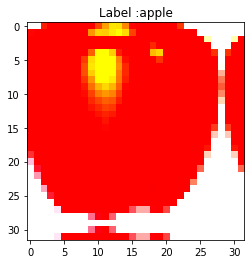

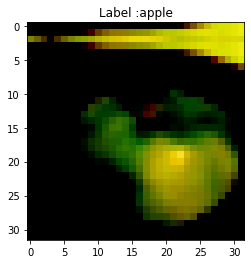

In [6]:
#Visualising data samples from train and test dataset
for i in range(2):
    image,label = train_data[i]
    plt.imshow(image.permute(1,2,0)) # 0th dimension should come last and 1st and 2nd dimension should come first
    plt.title("Label :{}".format(train_data.classes[label]))
    plt.show()

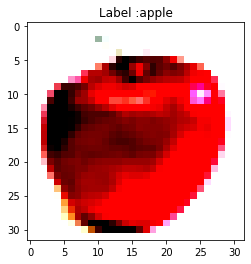

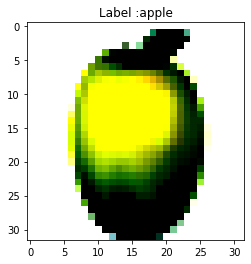

In [7]:
#Visualising data samples from train and test dataset
for i in range(2):
    image,label = test_data[i]
    plt.imshow(image.permute(1,2,0)) # 0th dimension should come last and 1st and 2nd dimension should come first
    plt.title("Label :{}".format(test_data.classes[label]))
    plt.show()

In [8]:
# splitting the data into train val
# defining random seed so as to ensure validation set is same across runs as random number generator is fixed. This is preferred mostly in a standard pipeline.
torch.manual_seed(32)


In [9]:
# splitting the train dataset into train, val split
# val_len = 10000
# train_len = len(train_data)-val_len
# train_set, val_set = random_split(train_data,[train_len,val_len])
# print("Length of training samples is {}".format(len(train_set)))
# print("Length of testing samples is {}".format(len(val_set)))

By splitting train dataset into train,val via this technique since it will not be uniform. We can prepare one by random shuffling but still We may miss few classes. So, we'll take test =val set. since after multiple runs, the accuracy via prior val set is very low.


In [ ]:
#creating dataloader
batch_size =4096
train_loader = DataLoader(train_data,batch_size,shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(test_data, batch_size,shuffle=True,  num_workers=4, pin_memory=True)

In [11]:
torch.cuda.is_available()

True

In [12]:
#passing the dataloader to gpu

def compute_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [13]:
device = compute_device()
device

device(type='cuda')

In [14]:
#moving data and model to a deice
def to_device(data,device):
    if isinstance(data,(list,tuple)):
        return [to_device(x,device) for x in data]
    return data.to(device,non_blocking=True)

In [15]:
#Defining the class of Device Data loader
class DeviceDataLoader():
    def __init__(self,data_loader,device) -> None:
        self.data_loader = data_loader
        self.device = device
    
    def __iter__(self):
        for batch in self.data_loader:
            yield to_device(batch,self.device)

    def __len__(self):
        return len(self.data_loader)

In [16]:
#moving the dataloaders to the device
train_loader = DeviceDataLoader(train_loader,device)
val_loader = DeviceDataLoader(val_loader,device)

In [17]:
input_size=32*32*3
num_classes = len(train_data.classes)

# Architecture of the Deep Neural Network.
##### General formula = n_out = floor[n-f+2p/s + 1]

* Adding batchnormalisation after every conv layer and dropout


#### Synatax in PyTorch

1. nn.Conv2D(num_channels, num_filters, kernel_size, stride,padding)
2. nn.MaxPool2d(horizontal_pixel_count,vertical_pixel_count)

In [18]:
# ;et's visualise how a batch's dimension is altered when it's passed through a convolutional layer
# conv_layer = nn.Conv2d(3,256,kernel_size=3, stride=1,padding=0)
# max_pool_layer = nn.MaxPool2d(2,2)
# for images,labels in train_loader:
#     print("input_shape is {}".format(images.shape))
#     output= conv_layer(images)
#     print("output_shape after conv_layer is {}".format(output.shape))
#     output = max_pool_layer(output)
#     print("output_shape after max_pool layer is {}".format(output.shape))
#     break

In [19]:
# function for calculating accuracy
def accuracy(outputs, labels):
    _,preds = torch.max(outputs,dim=1)
    return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [20]:
#defining a classification base which shall be extended in all image classification examples
# Boiler plate code
class ImageClassificationBase(nn.Module):

    #training step    
    def training_step(self,batch) -> Tensor:
        images,labels = batch
        logits = self(images)
        loss = F.cross_entropy(logits,labels)
        return loss
    #validation step

    def validation_step(self,batch) -> dict:
        images,labels =batch
        logits = self(images)
        loss = F.cross_entropy(logits,labels)
        acc = accuracy(logits,labels)
        return {'val_loss':loss, 'val_acc':acc}
    #method for epoch end

    def validation_epoch_end(self,outputs) -> dict:
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss': epoch_loss.item(), 'val_acc':epoch_acc.item()}

    def epoch_end(self,epoch,result):
        print("Epoch [{}], train_loss:{:.4f}, val_loss:{:.4f}, val_acc: {:.4f}".format(epoch,result['train_loss'],result['val_loss'],result['val_acc']))


In [21]:
#defining the model
class CNN_Model(ImageClassificationBase): # building our model by extending the classification base
    def __init__(self) -> None:
        super().__init__()
        # defining the sequential module as per architecture quoted above
        self.architecture = nn.Sequential(
            nn.Conv2d(3,64,kernel_size=3,padding=2,stride=1),
            nn.Dropout(p=0.1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(64,128,kernel_size=3,padding=2,stride=1),
            nn.Dropout(p=0.1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(128,256,kernel_size=3,padding=2,stride=1),
            nn.Dropout(p=0.1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Flatten(),
            nn.Linear(256*5*5,1024),
            nn.ReLU(),
            nn.Linear(1024,512),
            nn.ReLU(),
            nn.Linear(512,100)
        )

    # defining the forward pass
    def forward(self,inputs):
        return self.architecture(inputs)

In [22]:
cnn_model = CNN_Model()

In [23]:
cnn_model

CNN_Model(
  (architecture): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): Dropout(p=0.1, inplace=False)
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (6): Dropout(p=0.1, inplace=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (11): Dropout(p=0.1, inplace=False)
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1

# Training phase - Boiler plate code
```for epoch in range(num_epochs):
    #training
    for batch in train_dataloader:
    # step1 - generate logits ie predictions from the model
    # step 2 - calculate loss
    # step3 - compute gradients
    # step4 - update weights via optimizer.step
    # step 4 = reset gradients - optimizers.zero_grad
    # step 5 - calculate metrics

    # validation
    for batch in val_dataloader
        #step 1 - generate logits
        # step 2 - calculate loss
        # step 3 - calculate metrics
    
    #calculate average loss of train and val and thus display
    ```

In [24]:
# defining the evaluate function
@torch.no_grad()
def evaluate(model,validation_dataloader):
    outputs = [model.validation_step(batch) for batch in validation_dataloader]
    return model.validation_epoch_end(outputs)

In [25]:
# defining the train
def fit(num_epochs,learning_rate, model, train_loader, val_loader, optimizer = torch.optim.Adam):
    history = []
    optimizer = optimizer(model.parameters(),learning_rate)

    for epoch in range(num_epochs):
        #training phase
        model.train()
        train_loss = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_loss.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad
        #val_phase
        result = evaluate(model,val_loader)
        result['train_loss']= torch.stack(train_loss).mean().item()
        model.epoch_end(epoch,result)
        history.append(result)
    
    return history

In [26]:
# moving the model to gpu
cnn_model = to_device(CNN_Model(), device)


In [29]:
num_epochs=10
optimizer = torch.optim.Adam
learning_rate=0.001


In [30]:
history = fit(num_epochs,learning_rate,cnn_model,train_loader,val_loader,optimizer)

Epoch [0], train_loss:4.6106, val_loss:4.6109, val_acc: 0.0109
Epoch [1], train_loss:4.6116, val_loss:4.6119, val_acc: 0.0099
Epoch [2], train_loss:4.6114, val_loss:4.6121, val_acc: 0.0098
Epoch [3], train_loss:4.6118, val_loss:4.6116, val_acc: 0.0101
Epoch [4], train_loss:4.6118, val_loss:4.6110, val_acc: 0.0103
Epoch [5], train_loss:4.6117, val_loss:4.6116, val_acc: 0.0094
Epoch [6], train_loss:4.6114, val_loss:4.6108, val_acc: 0.0096
Epoch [7], train_loss:4.6110, val_loss:4.6108, val_acc: 0.0101
Epoch [8], train_loss:4.6110, val_loss:4.6102, val_acc: 0.0098
Epoch [9], train_loss:4.6105, val_loss:4.6110, val_acc: 0.0096


Text(0.5, 1.0, 'Accuracy plot')

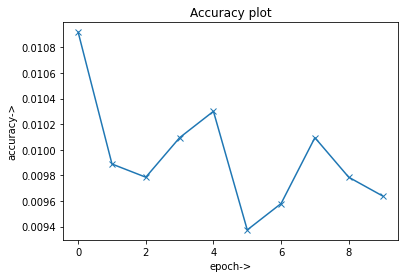

In [31]:
# plotting the curves
accuracy = [result['val_acc'] for result in history]
plt.plot(accuracy,'-x')
plt.xlabel('epoch->')
plt.ylabel('accuracy->')
plt.title('Accuracy plot')

Text(0.5, 1.0, 'Val Loss plot')

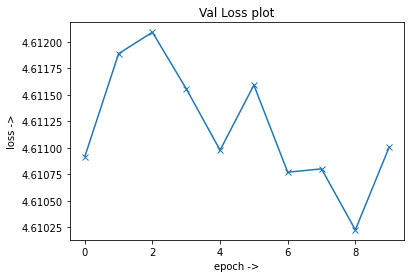

In [32]:
# plotting the curves
loss = [result['val_loss'] for result in history]
plt.plot(loss,'-x')
plt.xlabel('epoch ->')
plt.ylabel('loss ->')
plt.title('Val Loss plot')

Text(0.5, 1.0, 'Train Loss plot')

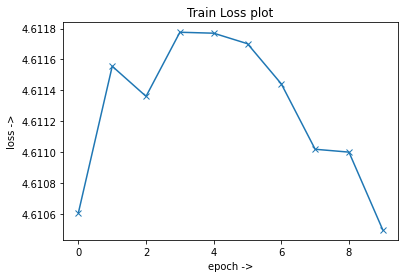

In [33]:
# plotting the curves
loss = [result['train_loss'] for result in history]
plt.plot(loss,'-x')
plt.xlabel('epoch ->')
plt.ylabel('loss ->')
plt.title('Train Loss plot')

In [34]:
# predicting on test_image
def predict(image,model):
    #img_data = image.reshape(-1,784)
    img_data = image.unsqueeze(0)
    #print(img_data.shape)
    probs = model(img_data)
    _, preds = torch.max(probs,dim=1)
    #print(preds[0].item)
    return preds[0].item()
    #return "Predicted Label is".format(dataset_labels_dict[str(preds[0].item())])

In [42]:
# saving the model by saving state_dict
torch.save(cnn_model.state_dict(), 'cifar100-cnn.pth')

In [43]:
# to view the weights and bias after training, refer the state_dict
cnn_model.state_dict()

OrderedDict([('architecture.0.weight', tensor([[[[-0.1875, -0.2321, -0.1163],
                        [-0.1284, -0.0620, -0.0369],
                        [-0.0659,  0.1036,  0.2357]],
              
                       [[-0.3220, -0.1771, -0.3810],
                        [-0.2322, -0.3982, -0.4470],
                        [-0.4987, -0.3799, -0.3851]],
              
                       [[-0.3195, -0.2270, -0.2536],
                        [-0.3109, -0.3506, -0.2092],
                        [-0.0631, -0.1617, -0.1662]]],
              
              
                      [[[ 0.1663,  0.2769,  0.3699],
                        [ 0.2482,  0.5062,  0.2984],
                        [ 0.4519,  0.2086,  0.4689]],
              
                       [[ 0.0265, -0.3916, -0.3959],
                        [-0.2929, -0.2036, -0.3781],
                        [-0.2572, -0.3024, -0.2794]],
              
                       [[ 0.2919, -0.0677, -0.0690],
                        [-0.238

# End Remarks
To increase the accuracy on 100 classes, Try
1. Transfer learning or
2. Tweaking the architecture as per SOTA with padding and train more.


The architecture is built primarily to showcase a Deep neural network comprised of CNNs, MaxPool, ReLU, BatchNorm, Linear and Flatten on a large dataset comprising of large number of classes.